In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dfm = pd.read_csv('CornellM_match_feedback.csv')
dfw = pd.read_csv('CornellWomenMerged.csv')

In [ ]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [5]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 23 columns):
Name                   201 non-null object
First Last             271 non-null object
LName                  201 non-null object
2019 Consituent        179 non-null object
LastMaiden             271 non-null object
LastMarried            105 non-null object
EMAIL                  204 non-null object
LinkedIn URL           176 non-null object
SearchResult           201 non-null object
2019 email             161 non-null object
FB Yes                 49 non-null object
Captain                48 non-null object
Match EC               215 non-null float64
FIRST                  271 non-null object
CLASS OF               271 non-null int64
YRS PLAYED - TOTALS    270 non-null float64
LinkedInLabel          271 non-null object
Other contact          74 non-null object
Headline               201 non-null object
Location               201 non-null object
Company                195 non-null o

In [23]:
Total = len(dfw['LinkedIn URL'])
Total

271

In [17]:
LinkedInCount = len(dfw['LinkedIn URL']) - dfw['LinkedIn URL'].isnull().sum()
LinkedInCount

176

In [26]:
LinkedInPct = LinkedInCount/Total
LinkedInPct

0.6494464944649446

In [15]:
dfw['LinkedIn URL'].isna().sum()

95

In [54]:
dfw_match = dfw[dfw['LinkedIn URL'] == dfw['SearchResult']]
Match = len(dfw_match['LinkedIn URL'])
MatchPct = Match/LinkedInCount
TotalPct = Match/Total

In [55]:
print('The number of LinkeIn profiles found is ' + str(LinkedInCount)+ ' out of '+ str(Total) + ' or ' +\
     str(round(LinkedInPct*100,2)) +"%")
print('The number of Matches for profiles found is ' + str(Match)+ ' out of '+ str(LinkedInCount) + ' or ' +\
     str(round(MatchPct*100,2)) +"%")
print('The number of Matching profiles is ' + str(Match)+ ' out of '+ str(Total) + ' or ' +\
     str(round(TotalPct*100,2)) +"%")



The number of LinkeIn profiles found is 176 out of 271 or 64.94%
The number of Matches for profiles found is 120 out of 176 or 68.18%
The number of Matching profiles is 120 out of 271 or 44.28%


In [6]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 25 columns):
LinkedIn_Manual    12 non-null object
EC_Review          271 non-null float64
Name_L             271 non-null object
LName              271 non-null object
FirstLast          342 non-null object
Name_R             229 non-null object
Year               342 non-null int64
SearchResult       271 non-null object
School             271 non-null object
Activites          271 non-null object
Criteria           342 non-null object
YearsPlayed        342 non-null int64
RosterLink         81 non-null object
Hometown           229 non-null object
HS                 226 non-null object
ClassYear          229 non-null object
College            342 non-null object
First              342 non-null object
Last               342 non-null object
MidInit            105 non-null object
MidName            6 non-null object
RosterYear         229 non-null object
Headline           271 non-null object
Loc

In [58]:
Total = len(dfm['SearchResult'])
LinkedInCount = len(dfm['SearchResult']) - dfm['SearchResult'].isnull().sum()
LinkedInPct = LinkedInCount/Total

In [64]:
dfm_match = dfm.loc[dfm['EC_Review'] == 1]
Match = len(dfm_match['SearchResult'])
MatchPct = Match/LinkedInCount
TotalPct = Match/Total

In [82]:
print('The number of LinkedIn profiles found is ' + str(LinkedInCount)+ ' out of '+ str(Total) + ' or ' +\
     str(round(LinkedInPct*100,2)) +"%")
print('The number of Matches for profiles found is ' + str(Match)+ ' out of '+ str(LinkedInCount) + ' or ' +\
     str(round(MatchPct*100,2)) +"%")
print('The number of Matching profiles is ' + str(Match)+ ' out of '+ str(Total) + ' or ' +\
     str(round(TotalPct*100,2)) +"%")


The number of LinkedIn profiles found is 271 out of 342 or 79.24%
The number of Matches for profiles found is 152 out of 271 or 56.09%
The number of Matching profiles is 152 out of 342 or 44.44%


In [85]:
SameName = dfm_match[dfm_match['Name_L'] == dfm_match['LName']]
DiffName = dfm_match[dfm_match['Name_L'] != dfm_match['LName']]

In [86]:
SameNameTotal = len(SameName['SearchResult'])
DiffNameTotal = len(DiffName['SearchResult'])

In [99]:
SameNameMatch = SameName.loc[SameName['EC_Review'] == 1]
SameMatchCount =  len(SameNameMatch['SearchResult'])
DiffNameMatch = DiffName.loc[DiffName['EC_Review'] == 1]
DiffMatchCount =  len(DiffNameMatch['SearchResult'])
SamePct = SameMatchCount/Match
DiffPct = DiffMatchCount/Match

In [103]:
print('Of the matching profiles ' + str(SameNameTotal)+ ' out of '+ str(Match) + ' or ' +\
     str(round(SamePct*100,2)) +"% return the same exact name from LinkedIn")
print('Conversely, ' + str(DiffNameTotal)+ ' out of '+ str(Match) + ' or ' +\
     str(round(DiffPct*100,2)) +"% are correct but spelling is slightly different on LinkedIn")


Of the matching profiles 113 out of 152 or 74.34% return the same exact name from LinkedIn
Conversely, 39 out of 152 or 25.66% are correct but spelling is slightly different on LinkedIn


In [125]:
dfm_nomatch = dfm.loc[dfm['EC_Review'] == 0]
NoMatchCount = len(dfm_nomatch['SearchResult'])
SameNameNo = dfm_nomatch[dfm_nomatch['Name_L'] == dfm_nomatch['LName']]
DiffNameNo = dfm_nomatch[dfm_nomatch['Name_L'] != dfm_nomatch['LName']]
SameNameBadMatch = len(SameNameNo['SearchResult'])
DiffNameNoMatch = len(DiffNameNo['SearchResult'])
SameBadPct = SameNameBadMatch/NoMatchCount
DiffBadPct = DiffNameNoMatch/NoMatchCount

In [129]:
print('Of the non-matching profiles ' + str(SameNameBadMatch)+ ' out of '+ str(NoMatchCount) + ' or ' +\
     str(round(SameBadPct*100,2)) +"% return the same exact name from LinkedIn")
print('Conversely, ' + str(DiffNameNoMatch)+ ' out of '+ str(NoMatchCount) + ' or ' +\
     str(round(DiffBadPct*100,2)) +"% are true non-matching names on LinkedIn")


Of the non-matching profiles 20 out of 119 or 16.81% return the same exact name from LinkedIn
Conversely, 99 out of 119 or 83.19% are true non-matching names on LinkedIn


In [ ]:
temp = pd.notnull(df['SearchResult']) 

In [130]:
dfm[dfm.SearchResult.notnull()].Year.value_counts(sort=False)

1947     4
1948     3
1949     1
1950     5
1951     4
        ..
2016     3
2017     7
2018     4
2019     2
2020    10
Name: Year, Length: 68, dtype: int64

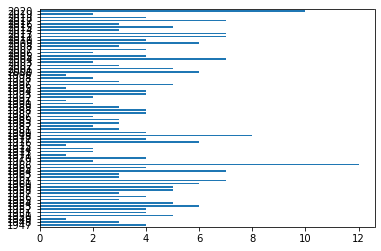

In [131]:
dfm[dfm.SearchResult.notnull()].Year.value_counts(sort=False).plot(kind='barh')

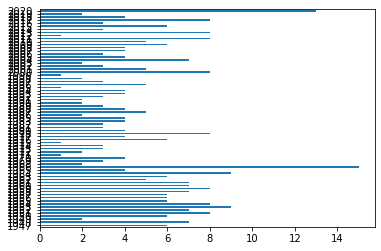

In [135]:
dfm.Year.value_counts(sort=False).plot(kind='barh')

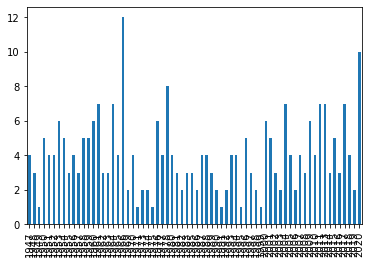

In [132]:
dfm[dfm.SearchResult.notnull()].Year.value_counts(sort=False).plot(kind='bar')

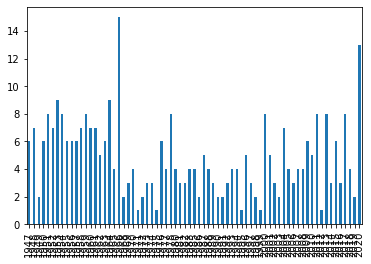

In [136]:
dfm.Year.value_counts(sort=False).plot(kind='bar')

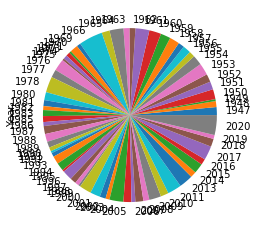

In [133]:
dfm[dfm.SearchResult.notnull()].Year.value_counts(sort=False).plot.pie()

In [ ]:
df['Year'].value_counts(sort=False).hist(figsize=(12,4), bins=71)